### DATA558 HW4
Emily Yamauchi

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Objective function:

$$
\begin{align}
F(\beta)=\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top \beta)^2 + \lambda||\beta||_1
\end{align}
$$

Find 

$$
 F(\beta^*)=\min_{\beta \in \mathbb{R}^d}F(\beta)
$$

**Algorithm 1** Cooridinate Descent Algorithm, general form  
**initialization** $\beta=0$  
**repeat** for $t=0,1,2,...$  
- Pick a coordinate index $j$ in $\{1,...d\}$  
- Find $\beta_j^{new}$ by minimizing $F(\beta)$ with respect to $\beta_j$ only.  
- Perform update $\beta_j^{(t+1)}=\beta_j^{new}$.
- Perform update $\beta_\ell^{(t+1)}=\beta_\ell^{(t)}$ for all $\ell\neq j$.  

**until** the stopping criterion is satisfied.

1. Assume that $d=1$ and $n=1$. The sampe is then of size 1 and boils down to just $(x,y)$; the learning parameter $\beta$ is then a scalar. The function $F$ writes simply as  
$$
\begin{align}
F(\beta)&=\frac{1}{2}(y-x\beta)^2+\lambda | \beta |
\end{align}
$$
The solution to the minimization problem $\min_\beta F(\beta)$ is given by soft thresholding:  

$$
\beta = \begin{cases} \frac{xy-\lambda}{x^2} & xy>\lambda \\ 0 & |xy|\leq \lambda \\ \frac{xy+\lambda}{x^2} & xy<-\lambda \end{cases}
$$

Implement the function $F(\beta)$ in the $n=1, d=1$ case. Implement a soft thresholding function that returns $\beta$ given $x, y, \lambda$. Plot $F(\beta)$, setting $x=1, y=1, \lambda=0.5$, and show visually that the minimum is obtained by your soft thresholding function.

In [2]:
def soft_thresholding(x, y, lamb):
    """
    Implement soft thresholding function that returns beta given x, y, and lambda
    When n = 1, d = 1
    """
    beta = 0
    
    if (x*y) > lamb:
        beta = (x*y - lamb)/(x**2)
    
    if (x*y) < -lamb:
        beta = (x*y + lamb)/(x**2)
    
    return beta

In [3]:
soft_thresholding(1, 1, 0.5)

0.5

In [20]:
def obj_func_1(beta, x, y, lamb):
    """
    Objective function when n = 1, d = 1
    """
    
    f1 = (y - x*beta)**2
    f2 = lamb * np.abs(beta)
    
    return f1/2 + f2

In [21]:
obj_func_1(0.5, 1, 1, 0.5)

0.375

In [22]:
x = 1
y = 1
lamb = 0.5

obj_x = np.linspace(-2, 2, 100)
obj_y = [obj_func_1(b, x, y, lamb) for b in obj_x]

In [28]:
min_x = soft_thresholding(x, y, lamb)
min_y = obj_func_1(min_x, x, y, lamb)

Text(0.5, 0.375, 'min')

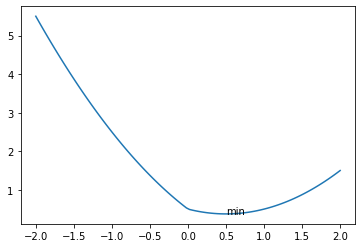

In [29]:
fig, ax = plt.subplots()
ax.plot(obj_x, obj_y)
ax.annotate('min', xy = (min_x, min_y))

2. Assume now that $d>1$ and $n>1$. The full minimization problem now writes as  
$$
\begin{align}
F(\beta)&=\frac{1}{2n}\sum_{i=1}^n(y_i-x_i^\top \beta)^2+\lambda || \beta ||_1
\end{align}
$$

Write a function *computeobj* that computes and returns $F(\beta)$ for any $\beta$, given $X, y,$ and $\lambda$. Plot this function by first generating some data, and then passing your implementation of *computeobj* as an argument to the plotting function provided.

In [74]:
np.random.seed(123)

X = np.random.normal(size=(10,2))
beta = np.array([2.0, -5.0])
y = np.dot(X, beta) + np.random.normal(10)
lam = 3.0

In [50]:
def plot_objective(X, y, computeobj, lambda_, min_beta=None, iterates=None):
    nb = 100
    brange = np.linspace(-10, 10, nb)
    b1, b2 = np.meshgrid(brange, brange)
    
    z = np.array([computeobj(beta, X, y, lambda_) for beta in zip(b1.ravel(), b2.ravel())])
    
    levels = np.logspace(-5, 4 ,100)
    
    plt.figure(figsize=(6,6))
    
    plt.hlines(y=0, xmin=-10, xmax=10, color='k')
    plt.vlines(x=0, ymin=-10, ymax=10, color='k')
    
    if min_beta is not None:
        plt.scatter(min_beta[0], min_beta[1], marker='x', s=100, color='k')
    
    if iterates is not None:
        #Arrows
        for j in range(1, len(iterates)):
            plt.annotate(
            "",
            xy=iterates[j],
            xytext=iterates[j-1],
            arrowprops={"arrowstyle:": "->", "color":color, "lw": 1},
            va="center",
            ha="center",
        )
    
    plt.contour(brange, brange, z.reshape((nb, nb)), levels=levels)

In [54]:
def computeobj(beta, X, y, lamb):
    """
    Return the objective function where n>1 and d>1
    """
    
    n = len(X)
    f1 = 1/(2*n)*sum((y-X.dot(beta))**2)
    f2 = np.linalg.norm(beta) * lamb
    
    return f1 + f2

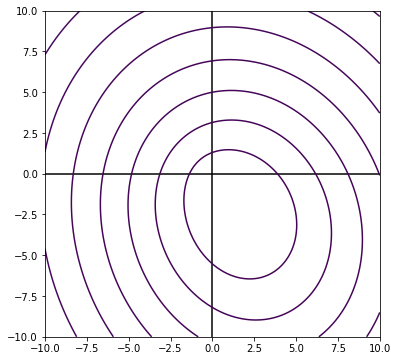

In [138]:
plot_objective(X, y, computeobj, lam)

3. Coordinate descent proceeds by sequential partial minimization with respect to each coordinate $\beta_j$, that by solving partial minimization problems of form 
$$
\min_{\beta_j}=\frac{1}{2n}\sum_{i=1}^n\{y_i-(\beta_ix_{i,1}+...+\beta_ix_{i,j}+...+\beta_ix_{i,d}\}^2 \\
+\lambda\{|\beta_1|+...+|\beta_j|+...+|\beta_d|\}
$$

Write a function *partial_min* that takes $X, y, \beta, \lambda$ and an index $j$, and returns the vector $\tilde{\beta}$ that results from minimizing $F(\beta)$ along coordinate $j$, starting at the point $\beta$. Using the same $X, y, \lambda$ as above, evaluate this function from the starting point `beta_init` and on the coordinate $j=1$:  
`beta_init = np.array([5.0, 5.0])  
j = 1`  
Generate the same contour plot as above, this time adding the initial point and the point that results from your partial minimization.  

$$
\min_{\beta_j}=\underbrace{ \frac{1}{2n}\sum_{i=1}^n\{y_i-(\beta_ix_{i,1}+...+\beta_ix_{i,j}+...+\beta_ix_{i,d}\}^2 }_1 \\
+\underbrace{ \lambda\{|\beta_1|+...+|\beta_j|+...+|\beta_d|\} }_2 \\
$$
Part 1 is minimized as \
$$
\begin{align}
\min_{\text{Part1}}&=-\frac{1}{n}X_j^\top(y-X_{-j}\beta_{-j}-X_j\beta_j)
\end{align}
$$
Part 2 is minimized as
$$
\min_\text{Part2} = \begin{cases} -\lambda & \beta < 0 \\ [-\lambda, \lambda] & \beta = 0 \\ \lambda & \beta > 0 \end{cases}
$$

Therefore, putting both together 

$$
\min_{\beta_j} = \begin{cases} \frac{\gamma_j - \lambda}{\eta_j} & \gamma_j > \lambda \\ 0 & -\lambda \leq \gamma_j \leq \lambda \\ \frac{\gamma_j + \lambda}{\eta_j} & \gamma_j < -\lambda \end{cases},
$$

and 
$$
\gamma_j = \frac{1}{n} X_j^T(y-X_{-j}^T\beta_{-j}) \\
\eta_j = \frac{1}{n} X_j^TX_j.
$$ 

In [227]:
def partial_min(beta, X, y, lamb, j):
    """
    Implements partial minimization to return vector beta' that results from minimizing F(Beta) along the j-coordinate
    X: nxd
    beta: 1xd
    y: nx1
    lamb: scalar
    j: index
    Returns: a number
    """
    n = X.shape[0]
    
    X_j = X[:,j]
    beta_j = beta[j]
    
    X_jMin = np.delete(X, j, axis = 1)
    beta_jMin = np.delete(beta, j, axis = 0)
    
    gamma = (X_j.T.dot(y - X_jMin.dot(beta_jMin))) * (1/n)
    eta = X_j.T.dot(X_j) * (1/n)
    
    min_b = 0
    
    if gamma > lamb:
        
        min_b = (gamma - lamb)/eta
    
    elif gamma < -lamb:
        
        min_b = (gamma + lamb)/eta
    
    return min_b

In [210]:
j = 1
beta_init = np.array([5, 5])

j_coord = partial_min(beta_init, X, y, lam, j)

In [216]:
np.array([5, j_coord])

array([ 5.        , -1.99460278])

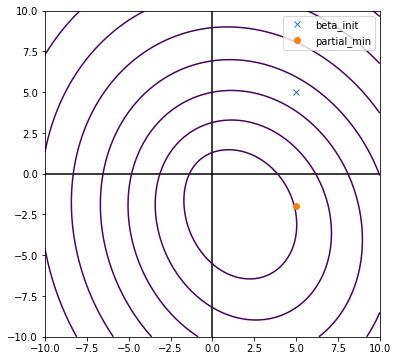

In [219]:
plot_objective(X, y, computeobj, lam)
plt.plot(beta_init[0], beta_init[1], 'x', label = 'beta_init')
plt.plot(beta_init[0], j_coord, 'o', label = 'partial_min')
plt.legend()

4. Download the file `HW4_data.csv` from the course website. The data is a subset of the `superconductivity` dataset from the UCI Machine Learning Repository. It consists of $n=100$ observations of $d=20$ features and one response. The goal is to predict the response, `critical_temp` from the features. Load the datas as a Pandas data frame, seperating it into features $X$ and response $y$. Standardize $X$ and $y$.

In [223]:
sc_df = pd.read_csv('data/HW4_data.csv')

In [225]:
sc_df.head()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,critical_temp
0,84.231574,57.842763,66.164102,36.112184,1.430024,1.138253,122.90607,33.640786,47.428396,53.589094,...,1009.946857,752.280835,937.287219,1.545214,0.812484,810.6,749.048857,294.283693,356.200361,5.0
1,88.944468,57.894262,66.361592,36.124868,1.181795,0.932518,122.90607,37.319570,51.968828,53.669752,...,1011.040571,718.152900,939.406232,1.305967,0.764604,810.6,746.035714,323.811808,354.499974,10.2
2,75.100250,51.579798,61.298642,35.158873,1.456708,1.390133,121.32760,19.623906,39.288902,44.284202,...,998.089172,705.732671,930.382127,1.542128,0.937941,810.6,690.345940,291.828474,346.349554,75.0
3,74.231650,51.480943,60.515221,35.113886,1.453747,1.340115,121.32760,20.650805,39.445875,44.246346,...,1003.200310,771.891022,937.305449,1.552506,0.929772,810.6,694.888235,282.395259,341.811885,53.0
4,119.942725,91.077409,90.003794,73.231604,1.590565,1.551095,191.20060,29.007229,70.961415,55.280514,...,721.865714,701.448928,687.113728,1.733547,1.540374,786.5,192.422857,268.928309,255.944162,90.0


In [226]:
sc_df.describe()

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,critical_temp
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,91.267645,62.470845,67.279305,41.675547,1.395333,1.334107,152.256706,25.776280,58.278272,55.536758,...,956.027671,723.822880,894.398244,1.557373,1.037880,795.254000,614.867748,290.555839,327.890152,46.928450
std,13.178910,13.281850,11.217558,13.215335,0.198448,0.264124,33.090412,8.612678,11.402871,7.958495,...,104.030450,30.938495,88.685229,0.212991,0.312775,21.098118,193.434543,31.212202,47.947602,36.916864
min,61.357238,47.618152,26.270151,30.713727,0.841338,0.932518,121.327600,11.027092,39.288902,43.145819,...,672.349583,638.226141,650.065839,1.021250,0.735100,723.700000,112.575000,234.380907,198.201132,4.000000
25%,83.729846,55.882976,64.751718,35.386005,1.181795,1.042813,122.906070,17.586018,48.238804,52.815410,...,955.593125,711.262897,886.470287,1.310185,0.787670,779.450000,607.678594,272.228524,330.875111,16.875000
50%,89.170086,57.878393,66.361592,36.120091,1.410948,1.358984,128.242600,25.567512,51.968828,53.651884,...,1007.517857,718.152900,937.348037,1.542583,0.939611,810.600000,694.877527,292.557305,345.385521,29.450000
75%,99.020971,62.507538,72.743816,39.962886,1.565293,1.546790,192.981000,34.255312,71.240702,61.258296,...,1010.661464,734.596714,939.100102,1.731008,1.091495,810.600000,738.769286,323.811808,355.241277,75.875000
max,142.376700,98.641607,98.761740,85.768282,1.818121,1.796118,192.981000,37.619066,78.477440,79.823052,...,1035.975000,831.170151,971.036295,1.904838,1.748310,810.600000,752.715000,347.221961,367.904468,121.000000
